In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt

%matplotlib inline


np.random.seed(101)

(2, 500)
(1, 500)


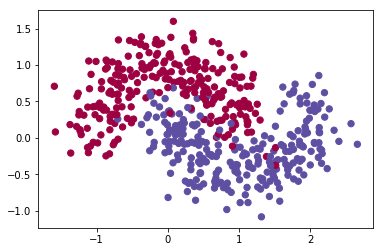

In [2]:
#Data Generation
dataset = sklearn.datasets.make_moons(n_samples=500 , shuffle=True, noise= 0.25, random_state=None)
X, Y = dataset
X, Y = X.T, Y.reshape(1, Y.shape[0])

plt.scatter(X[0, :], X[1, :], c=Y.ravel() , s=40, cmap=plt.cm.Spectral)

print(X.shape)
print(Y.shape)

In [3]:
# Defining Layer Structures
def layer_sizes(X,Y,n_h):
    n_x = X.shape[0]
    n_h = n_h
    n_y = Y.shape[0]
    
    
    return {
        "n_x" : n_x,
        "n_h" : n_h,
        "n_y" : n_y
    }

In [4]:
def initialize_parameters(layer_structure):
    
    n_x = layer_structure["n_x"]
    n_h = layer_structure["n_h"]
    n_y = layer_structure["n_y"]
        
    W1 = np.random.randn(n_h , n_x) * 0.01
    b1 = np.zeros((n_h , 1) , dtype = float)
    W2 = np.random.randn(n_y , n_h) * 0.01
    b2 = np.zeros((n_y , 1) , dtype = float)
    
    
    
    return {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2
    }

In [5]:
def sigmoid(z):
    A = 1 / (1 +  np.exp(-z))
    
    return A

In [6]:
def forward_propogation(X , model_parameters):
    
    W1 = model_parameters["W1"]
    b1 = model_parameters["b1"]
    W2 = model_parameters["W2"]
    b2 = model_parameters["b2"]
    
    
    # result from 1st layer => hidden layer
    
    Z1 = np.dot(W1 , X) + b1
    A1 = np.tanh(Z1) # Using Tanh as the Activation Function 
    
    # result from 2nd layer => output layer
    
    Z2 = np.dot(W2 , A1) + b2
    A2 = sigmoid(Z2) # Output Layer of Binary Classifier is Sigmoid Activated
    
    
    return {
        "Z1" : Z1 , "A1" : A1,
        "Z2" : Z2 , "A2" : A2
    }

In [7]:
def get_cost(A , Y):
    
    m = Y.shape[1]
    logprod = np.multiply(Y , np.log(A)) + np.multiply(1 - Y , np.log(1 - A))
    cost = (-1/m)*np.sum(logprod , axis = 1 , keepdims = True)
    cost = np.squeeze(cost)
    
    return cost 

In [8]:
def backward_propogation(X , Y , model_parameters , frwd_prop_parameters):
    
    m = X.shape[1]
    
    A2 = frwd_prop_parameters["A2"]
    A1 = frwd_prop_parameters["A1"]
    W2 = model_parameters["W2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2 , A1.T)
    db2 = (1/m) * np.sum(dZ2 , axis = 1 , keepdims = True)
    
    
    dZ1 = np.dot(W2.T , dZ2) * (1 - np.power(A1 , 2))
    dW1 = (1/m) * np.dot(dZ1 , X.T)
    db1 = (1/m) * np.sum(dZ1 , axis = 1 , keepdims = True)
    
    
    return {
        "dZ1" : dZ1 , "dW1" : dW1 , "db1" : db1 ,
        "dZ2" : dZ2 , "dW2" : dW2 , "db2" : db2
    }
    
    

In [9]:
def optimize_parameters(grads , model_parameters , learning_rate = 0.05):
    
    W1 = model_parameters["W1"]
    b1 = model_parameters["b1"]
    W2 = model_parameters["W2"]
    b2 = model_parameters["b2"]
    
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - (learning_rate * dW1)
    W2 = W2 - (learning_rate * dW2)
    b1 = b1 - (learning_rate * db1)
    b2 = b2 - (learning_rate * db2)

    return {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2
    } 
    
    

In [10]:
def model_nn(X , Y , n_h , learning_rate = 0.5 , num_iterations = 20000 , print_cost = False):
    
    layer_structure = layer_sizes(X , Y , n_h)

    model_parameters = initialize_parameters(layer_structure)
    
    
    for i in range(num_iterations):
        
        frwd_prop_parameters = forward_propogation(X , model_parameters)
        
        cost = get_cost(frwd_prop_parameters["A2"] , Y)
        
        grads = backward_propogation(X , Y , model_parameters , frwd_prop_parameters)
        
        model_parameters = optimize_parameters(grads , model_parameters , learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Iteration %i => Costs %f" %(i,cost))
            
    
    return model_parameters
    
    

In [11]:
model_parameters = model_nn(X , Y , 6 , learning_rate = 1.5 , num_iterations = 50000 , print_cost = True)

print(model_parameters)

Iteration 0 => Costs 0.693204
Iteration 1000 => Costs 0.122167
Iteration 2000 => Costs 0.110984
Iteration 3000 => Costs 0.106570
Iteration 4000 => Costs 0.105489
Iteration 5000 => Costs 0.103308
Iteration 6000 => Costs 0.102296
Iteration 7000 => Costs 0.101586
Iteration 8000 => Costs 0.101012
Iteration 9000 => Costs 0.100561
Iteration 10000 => Costs 0.100213
Iteration 11000 => Costs 0.099943
Iteration 12000 => Costs 0.099716
Iteration 13000 => Costs 0.099494
Iteration 14000 => Costs 0.099256
Iteration 15000 => Costs 0.098997
Iteration 16000 => Costs 0.098728
Iteration 17000 => Costs 0.098462
Iteration 18000 => Costs 0.098210
Iteration 19000 => Costs 0.097976
Iteration 20000 => Costs 0.097762
Iteration 21000 => Costs 0.097565
Iteration 22000 => Costs 0.097384
Iteration 23000 => Costs 0.097218
Iteration 24000 => Costs 0.097063
Iteration 25000 => Costs 0.096919
Iteration 26000 => Costs 0.096784
Iteration 27000 => Costs 0.096657
Iteration 28000 => Costs 0.096537
Iteration 29000 => Costs 0.

In [12]:
def predict(X , model_parameters):
    
    frwd_prop_parameters = forward_propogation(X , model_parameters)
    
    A2 = frwd_prop_parameters["A2"]
    
    predictions = ( A2 > 0.5 )
    
    return predictions

In [13]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

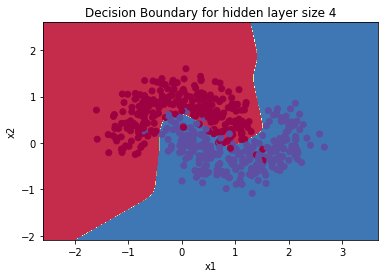

In [14]:
plot_decision_boundary(lambda x: predict(x.T , model_parameters), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [15]:
predictions = predict(X ,model_parameters)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 96%
